# Merkmalsextraktion II
## Savitzky-Golay Filter

Benötigte Signale:
- '07_features_C001901_control.REC_ECG_clip.dat' aus LV 07

In [1]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal as sg

In [2]:
plt.rcParams["figure.figsize"] = (16,6)
data_dir = "../input-data"

## Ein künstliches Signal (aus LV 04)

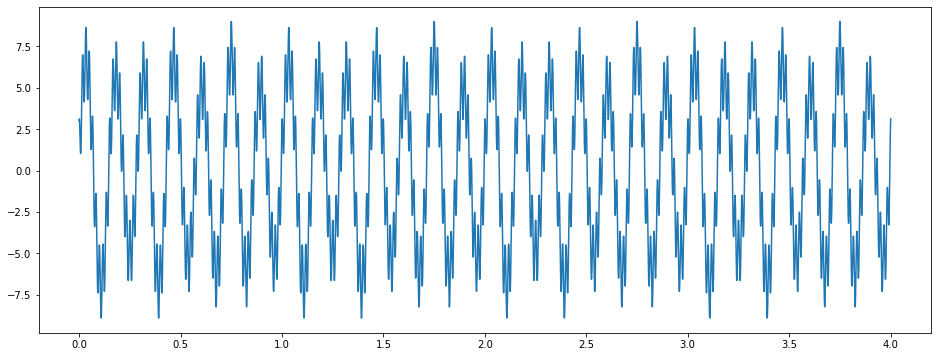

In [3]:
# simulate signal (from LV 04)
xmax = 4.001
x = np.arange(0.0, xmax, 1/2500)
y = np.cos(2*np.pi*4*x)+2*np.cos(2*np.pi*60*x)+6*np.sin(2*np.pi*7*x)
plt.plot(x,y)

### Anschauen in der Frequenzdomäne

Text(0, 0.5, 'Abs[dft]')

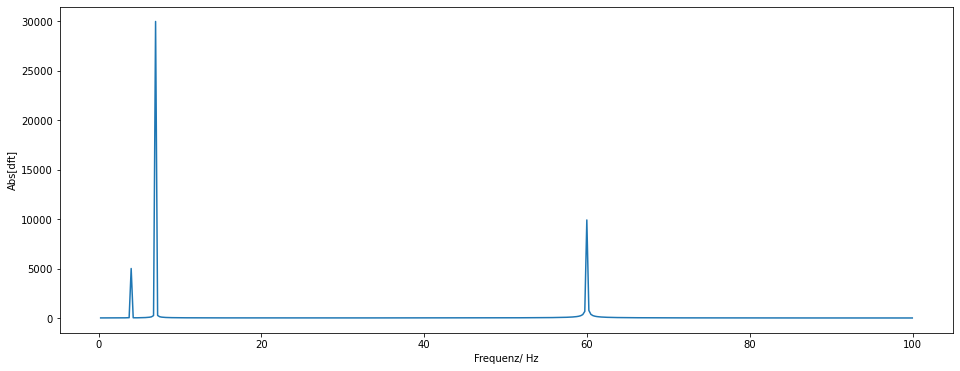

In [4]:
dft = np.fft.fft(y) # Berechnen der Diskreten Fourier-Transformation mit dem Fast-Fourier-Transform-Algorithmus
freq = np.fft.fftfreq(len(x))*2500
posmask = np.where(freq > 0) # Wir betrachten nur die positiven Frequenzen
lwrmask = np.where(freq < 100) # Wir betrachten nur die Frequenzen < 100 Hz
mask = np.intersect1d(posmask, lwrmask)
plt.plot(freq[mask], abs(dft[mask]))
plt.xlabel('Frequenz/ Hz')
plt.ylabel('Abs[dft]')

### **Q1:** Wie können Sie dieses Signal mit einem geeigneten Savitzky-Golay Filter differenzieren? Probieren Sie verschiedene Filterparameter und plotten Sie diese Ableitung. Was fällt Ihnen auf?
Hinweis: sin(omega(t) t)' = (omega(t)' t + omega(t)) cos(omega(t) t) 

In [ ]:
ys = sg.savgol_filter pass
plt.plot(x, ys)

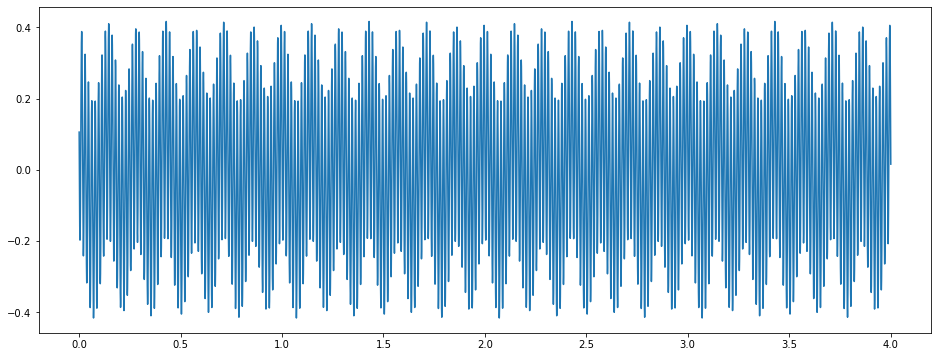

In [5]:
# Musterlösung
ys = sg.savgol_filter(y, 9, 4, deriv=1)
plt.plot(x, ys)

### **A1:** Der Plot ist wesentlich unruhiger als das ursprüngliche Signal.

### **Q2** Welche Eigenschaften hat die Ableitung in der Frequenzdomäne? Betrachten (plotten) Sie nur positive Frequenzen < 100 Hz.

In [ ]:
dft = np.fft.fft(ys) # Berechnen der Diskreten Fourier-Transformation mit dem Fast-Fourier-Transform-Algorithmus
freq = np.fft.fftfreq(len(x))*2500
pass

Text(0, 0.5, 'Abs[dft]')

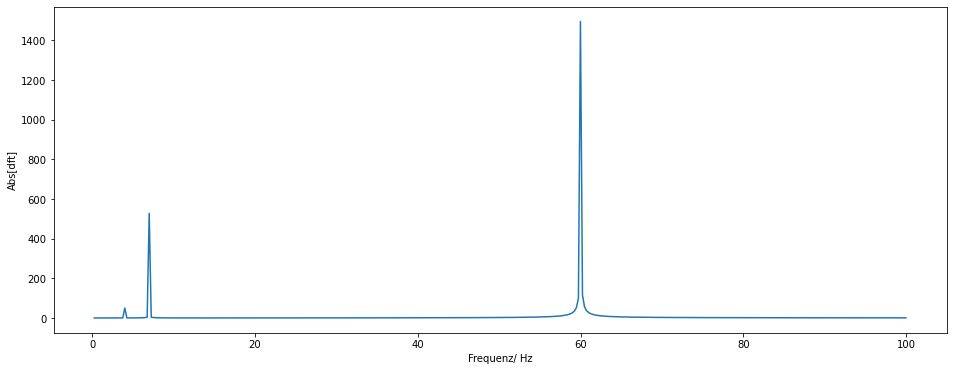

In [6]:
# Musterlösung
dft = np.fft.fft(ys) # Berechnen der Diskreten Fourier-Transformation mit dem Fast-Fourier-Transform-Algorithmus
freq = np.fft.fftfreq(len(x))*2500
posmask = np.where(freq > 0) # Wir betrachten nur die positiven Frequenzen
lwrmask = np.where(freq < 100) # Wir betrachten nur die Frequenzen < 100 Hz
mask = np.intersect1d(posmask, lwrmask)
plt.plot(freq[mask], abs(dft[mask]))
plt.xlabel('Frequenz/ Hz')
plt.ylabel('Abs[dft]')

### **A2:** Hier ist omega konstant, also werden die einzelnen Amplituden mit omega multipliziert aber die Phasen ändern sich. Hohe Frequenzen werden also "verstärkt".

# Merkmalsextraktion II: Alignment

## Beispielsignal aus LV 07

In [7]:
# filename 
file_name = '07_features_C001901_control.REC_ECG_clip.dat'
# metadata
sampling_frequency = 200
physical_minimum=-2
physical_maximum=2
digital_minimum=-8403
digital_maximum=8404
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='mV'
plot_label = signal_label + '/ ' + physical_dim
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency

Signal ansehen

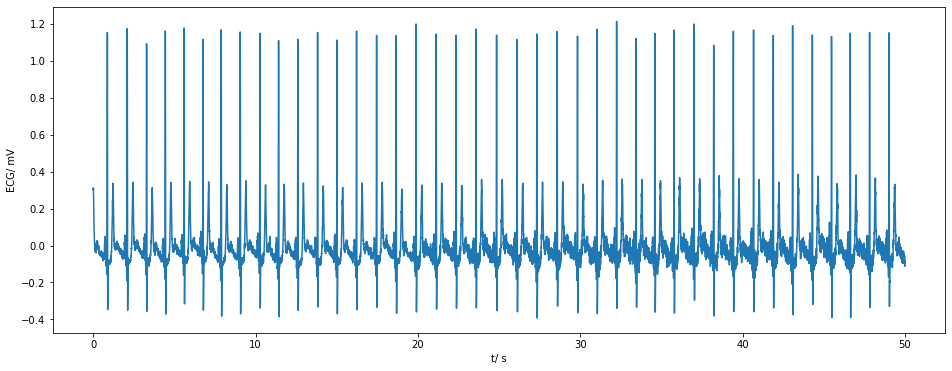

In [8]:
plt.plot(timesteps, signal)
# xlabel 
plt.xlabel('t/ s')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

Peaks bestimmen

In [9]:
peaks = sg.find_peaks(signal, height=1) 

In [10]:
Rpeaks = peaks[0]  # Die Höhen der Peaks sind hier uninteressant,
n_peaks = Rpeaks.size # dafür aber ist aber ihre Anzahl interessant

### **Q3:** Wie ist die Breite eines Fensters (in Samplen), welches einen kompletten PQRST-Komplex beinhaltet? 
Schätzen Sie diese mit der Herzfrequenz ab, hier etwa 0.82 Hz.

In [ ]:
0.82* pass

### **A3:** Etwa 164 Samples.

In [11]:
# Musterlösung
0.82*sampling_frequency

164.0

### **Q4:** Wo liegen, relativ zu den jeweiligen R-Zacken, Anfang und Ende des PQRST-Komplexes? 
Schätzen Sie den Beginn und das Ende jedes Signals relativ zu einem R-Peak.

In [ ]:
s_pre = pass
s_post = pass
s_window = s_pre + s_post
window_begin = Rpeaks - s_pre
window_end = Rpeaks + s_post

In [12]:
# Musterlösung
s_pre = 45
s_post = 90
s_window = s_pre + s_post
window_begin = Rpeaks - s_pre
window_end = Rpeaks + s_post

### **Q5:** Wie können Sie Ihre Vermutung Überprüfen? 
Denken Sie dabei an einen oder mehrerere Plots.

In [ ]:
plt.plot(pass)
plt.title("Testausschnitt PQRST")
plt.show()

### **A5:** Mit einem Plot von signal[window_begin[i]:window_end[i].

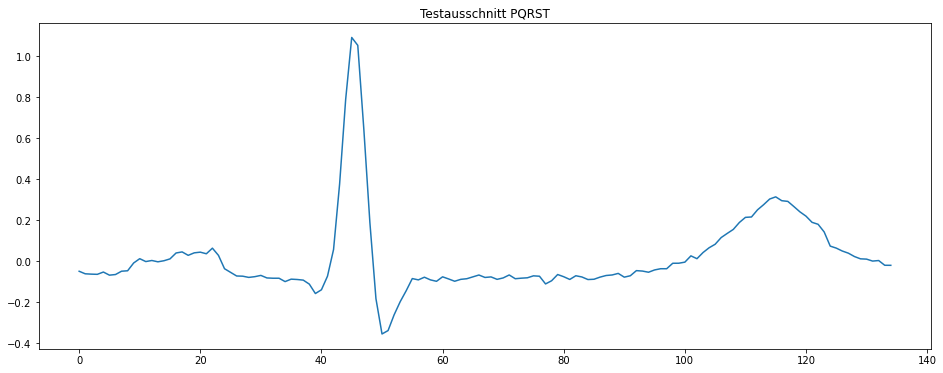

In [13]:
# Musterlösung
plt.plot(signal[window_begin[2]:window_end[2]])
plt.title("Testausschnitt PQRST")
plt.show()

## Signal alignen (hier: am R-Zacken ausrichten)

In [14]:
alsig = signal[window_begin[0]:window_end[0]] # Initialisierung
# Bei 1 beginnen
for i in range(1, n_peaks):
    alsig = np.append(alsig, signal[window_begin[i]:window_end[i]])

In [15]:
print(alsig.shape)
aligned_signal = np.reshape(alsig, (n_peaks, s_window))
print(aligned_signal.shape)

(5535,)
(41, 135)


### **Q6:** Mit welchen Plots könnes Sie deses alignte Signal visualisieren?
Hinweis: Boxplots, Konturplots.

In [ ]:
# Boxplot
pass

In [ ]:
# Konturplot
pass

### **A06.1** Boxplots

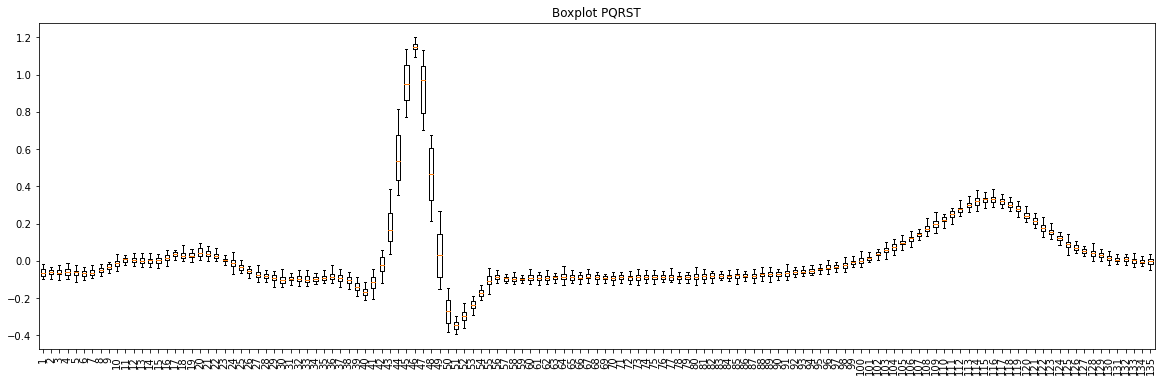

In [16]:
# Musterlösung
plt.rcParams["figure.figsize"] = (20,6)
plt.boxplot(aligned_signal, sym="") # Outlier weglassen
plt.xticks(rotation = 90)
plt.title("Boxplot PQRST")
plt.show()

### **A06.2** Konturplot

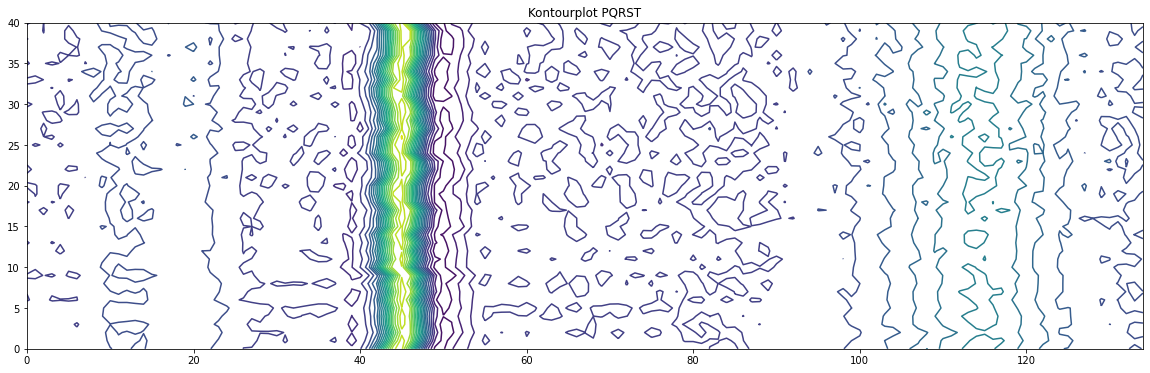

In [17]:
# Musterlösung
plt.contour(aligned_signal, levels=25)
plt.title("Kontourplot PQRST")
plt.show()